# California Housing Price Prediction

[Image Source](https://unsplash.com/)
![link text](https://drive.google.com/uc?id=1rnAMgV4M8to4iWOsxCwhHwY3BDDEscNg)

**Set up Environment**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
%matplotlib inline

**Load Data**

In [ ]:
california_housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
california_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Take a look on Data**

In [ ]:
california_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#shape of the data
california_housing.shape

(20640, 10)

**Checking Missing Data**

In [ ]:
missing_percent = california_housing.isna().sum() * 100 /len(california_housing)
missing_percent

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
california_housing['total_bedrooms'].isna().sum()

207

**Descriptive statistics of Numerical Features**

In [ ]:
california_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis

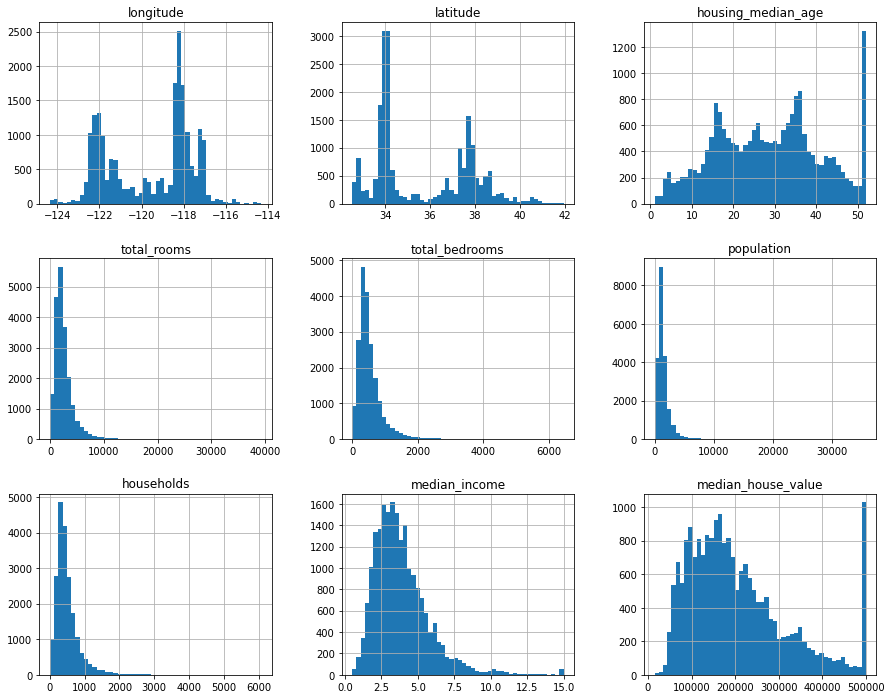

In [ ]:
california_housing.hist(bins = 50,figsize=(15,12))
plt.show()

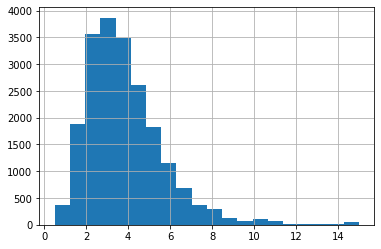

In [ ]:
california_housing['median_income'].hist(bins = 20)

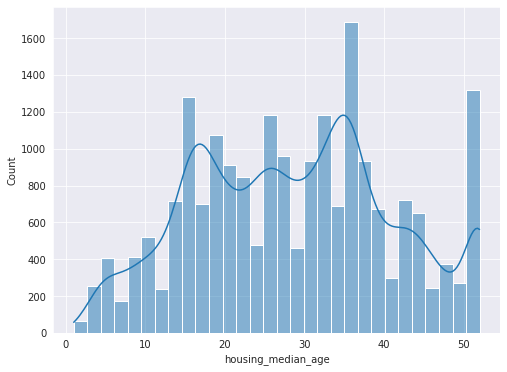

In [ ]:
# Housing Median age distribution
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.histplot(data=california_housing, x='housing_median_age',alpha =0.5,bins =30, kde=True)#
plt.show()

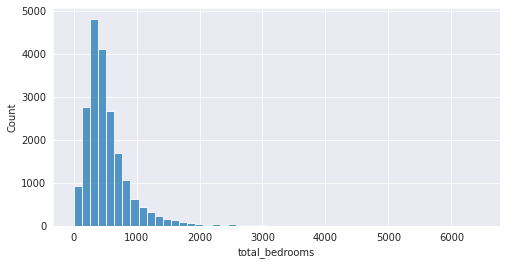

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(data=california_housing, x='total_bedrooms',bins =50)
plt.show()

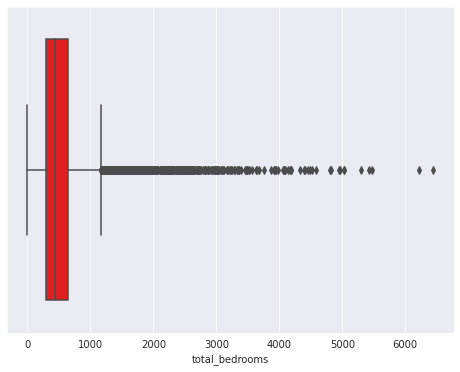

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='total_bedrooms',color='red', data=california_housing)
plt.show()

In [ ]:
california_housing['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

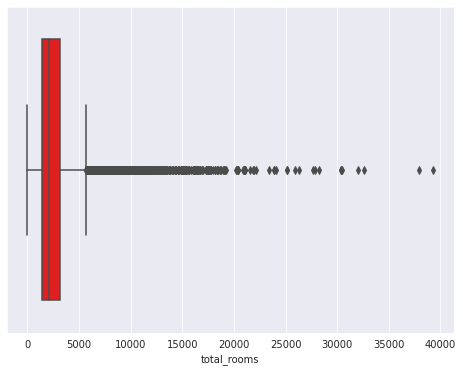

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='total_rooms', data=california_housing,color='red')
plt.show()

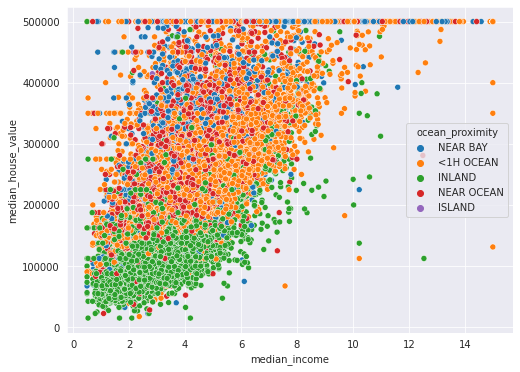

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='median_income',y='median_house_value', hue='ocean_proximity', data=california_housing)
plt.show()

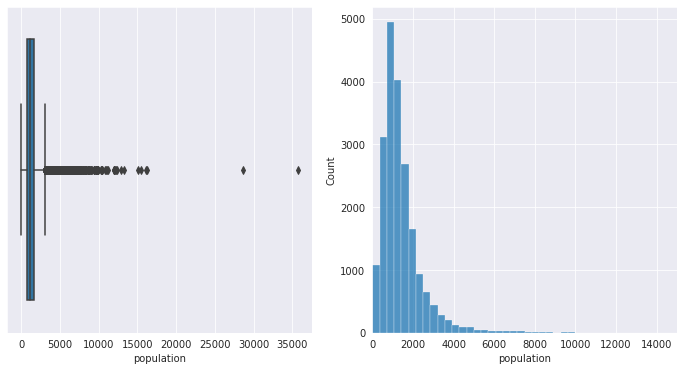

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x='population', data=california_housing)
plt.subplot(1,2,2)
sns.histplot(data=california_housing,x='population', bins=100)
plt.xlim(0,15000)
plt.show()

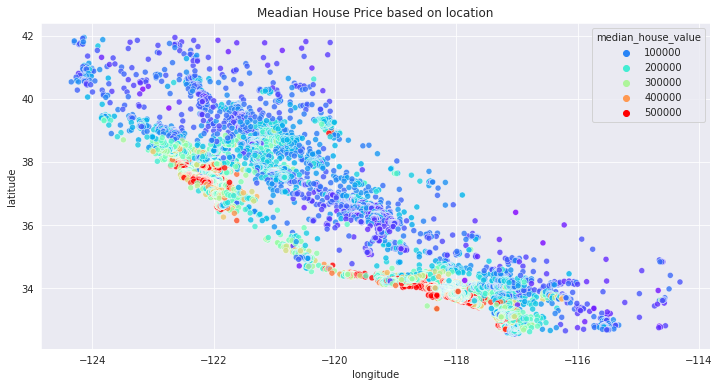

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='longitude',y='latitude', data=california_housing, hue= 'median_house_value',palette='rainbow', alpha=0.8)
plt.title('Meadian House Price based on location')
plt.show()

In [ ]:
plt.figure(figsize=(4,3))
px.scatter(california_housing,x='longitude',y='latitude', color= 'ocean_proximity',symbol='ocean_proximity')

<Figure size 288x216 with 0 Axes>

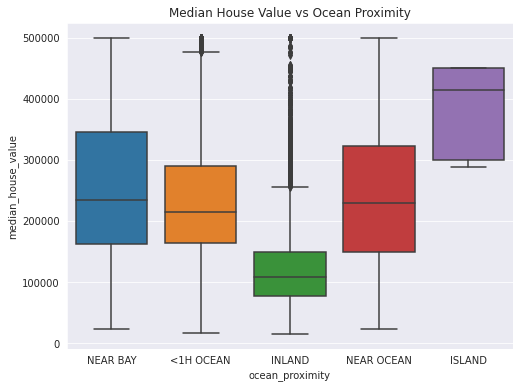

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=california_housing)
plt.title('Median House Value vs Ocean Proximity')
plt.show()

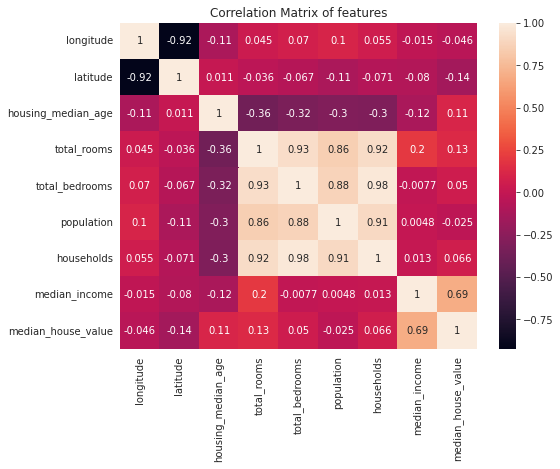

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(california_housing.corr(),annot=True)
plt.title('Correlation Matrix of features')
plt.show()


## Detecting Outliers

There are many approaches availabe for detecting outliers in  dataset. Such as `Z Score`,`IQR (Inter Quantile Range)`, `Box Plot`. Here, we will  use `IQR` for detecting and removing outliers from the data set. Although, we have already seen in the box plot that we have outliers in the dataset.

In [ ]:
california_housing_2 = california_housing.copy()
Q1 = california_housing.quantile(0.25)
Q3 = california_housing.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           351.00000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64


In [ ]:
california_housing_2 = california_housing_2[~((california_housing_2 < (Q1 - 1.5 * IQR)) |(california_housing_2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
california_housing.shape, california_housing_2.shape

((20640, 10), (17621, 10))

## **Encoding Missing values**

In [ ]:
california_housing['total_bedrooms'].isna().sum()

207

There are 207 missing values in total_bedrooms feature. We can encode the missing values by taking the median of total_bedrooms. 

In [ ]:
california_housing_2.fillna(value=california_housing_2['total_bedrooms'].median(),inplace=True)

In [ ]:
california_housing_2.total_bedrooms.isna().sum()

0

## **Creating New features**

In [ ]:

california_housing_2['bedrooms_per_rooms'] = california_housing_2['total_bedrooms'] /california_housing_2['total_rooms']
california_housing_2['total_rooms_per_household'] = california_housing_2['total_rooms']/california_housing_2['households']
california_housing_2['population_per_househod'] = california_housing_2['population']/california_housing_2['households']

## **Scaling the Features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder,StandardScaler
from sklearn.compose import make_column_transformer

In [ ]:
california_housing_2.ocean_proximity.value_counts()

<1H OCEAN     7612
INLAND        5871
NEAR OCEAN    2231
NEAR BAY      1902
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
california_housing_2.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

 Now, let's create a list of proximity of ocean based on the distance from the Ocean.

In [ ]:
proximity_n = [ 'INLAND','<1H OCEAN', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

 The features of dataset are in different scale. It is a good practice to scale all the  features in the same scale.

In [ ]:
ct = make_column_transformer(
...     (MinMaxScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','bedrooms_per_rooms',
       'total_rooms_per_household', 'population_per_househod']),
...     (OrdinalEncoder(categories=[proximity_n]),['ocean_proximity']))

In [ ]:
ct = make_column_transformer(
...     (MinMaxScaler(), ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']),
...     (OrdinalEncoder(categories=[proximity_n]),['ocean_proximity']))

# Creating Train and Test data set

In [ ]:
X = california_housing_2.drop('median_house_value', axis=1)
y = california_housing_2.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Final Training Dataset after scaling 
pd.DataFrame(X_train_normal).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.511723,0.406183,0.117647,0.632431,0.596926,0.664215,0.620753,0.347632,0.069507,0.033873,0.037672,0.0
1,0.300714,0.652452,0.137255,0.583890,0.685739,0.540774,0.708907,0.293048,0.098312,0.026167,0.023729,0.0
2,0.217125,0.555437,0.725490,0.174112,0.349701,0.233131,0.235996,0.149067,0.202933,0.022659,0.033841,3.0
3,0.638124,0.139659,0.333333,0.637707,0.464560,0.613687,0.497704,0.932689,0.042617,0.044218,0.045050,1.0
4,0.469929,0.200426,1.000000,0.052761,0.093937,0.124400,0.102847,0.279295,0.176272,0.013691,0.043552,1.0


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet

**Machine Learning algorithms**, we are going to use 

- Linear Regression
- Decision Tree Regressor
- Lasso 
- Elastic Net 
- Random Forest Regression

**Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train_normal,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_predict = lr.predict(X_test_normal)
y_predict

array([241122.30696396, 165814.67478566, 303428.50957757, ...,
       292115.79584561, 195816.1823201 , 126088.52296349])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [ ]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict))

mean absolute error:  43673.66880881703
 root mean squared error:  58105.03264839571
Coefficient of determination R^2:  0.6218554573603465


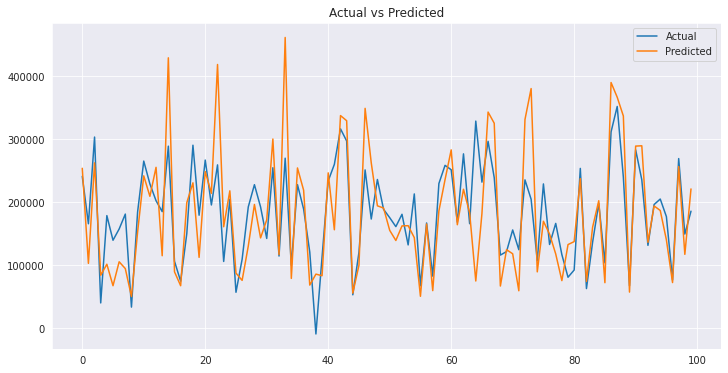

In [ ]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(criterion='mse',splitter='best')
dt.fit(X_train_normal,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_predict_dt = dt.predict(X_test_normal)

In [ ]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_dt))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_dt)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_dt))

mean absolute error:  42399.96273879326
 root mean squared error:  63966.298146322064
Coefficient of determination R^2:  0.5417180272321647


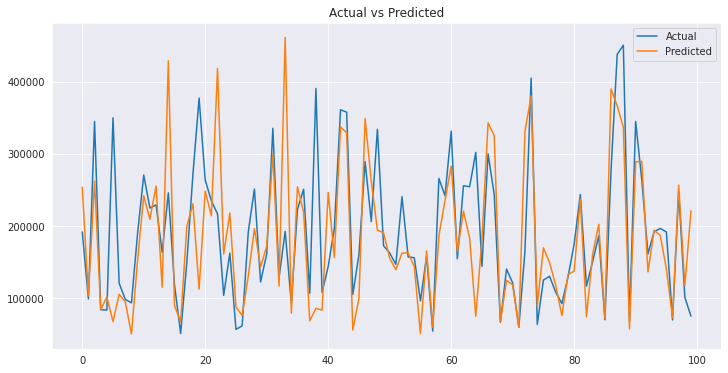

In [ ]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_dt,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

**Lasso Regression**

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_normal,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_predict_lasso = lasso.predict(X_test_normal) 

In [ ]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_lasso))
print(' root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_lasso))

mean absolute error:  43673.67193329812
 root mean squared error:  58105.03739413804
Coefficient of determination R^2:  0.6218553955902535


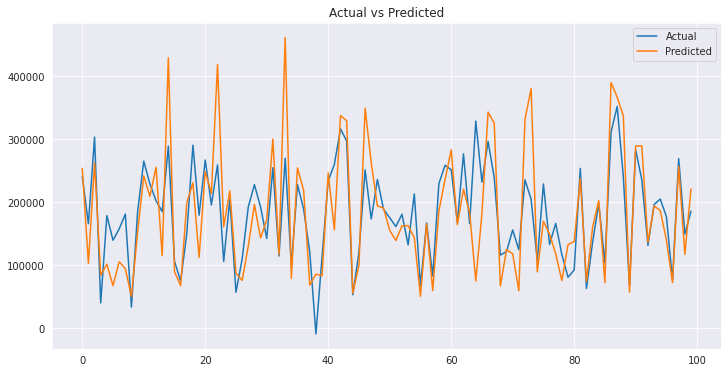

In [ ]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_lasso,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

**Elastic Net**

In [ ]:
elas_net  = ElasticNet(0.001)
elas_net.fit(X_train_normal,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_predict_el = elas_net.predict(X_test_normal)
y_predict_el

array([239444.93115907, 173505.68336759, 305915.15326267, ...,
       296017.09331278, 192820.20852941, 125632.11095982])

In [ ]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_el))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_el)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_el))

mean absolute error:  43830.06102620168
root mean squared error:  58478.09253520103
Coefficient of determination R^2:  0.6169841606285498


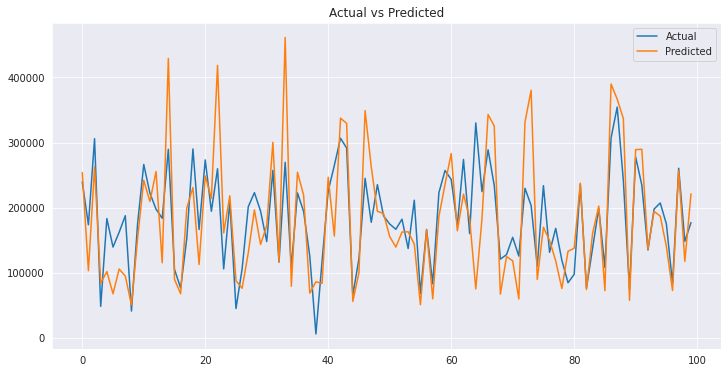

In [ ]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_el,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
%%time
rf = RandomForestRegressor()
rf.fit(X_train_normal,y_train)

CPU times: user 10.8 s, sys: 77.3 ms, total: 10.9 s
Wall time: 10.9 s


In [ ]:
y_predict_rf = rf.predict(X_test_normal)
y_predict_rf

array([221057., 118909., 321344., ..., 312876., 152537., 109166.])

In [ ]:
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

mean absolute error:  30167.161698505763
root mean squared error:  44537.7183823784
Coefficient of determination R^2:  0.7778295638205454


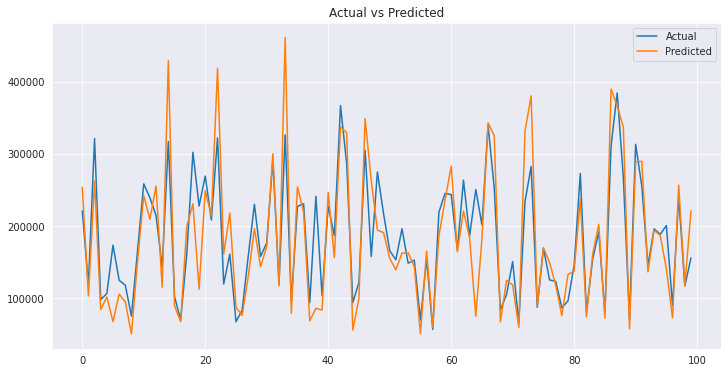

In [ ]:
fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



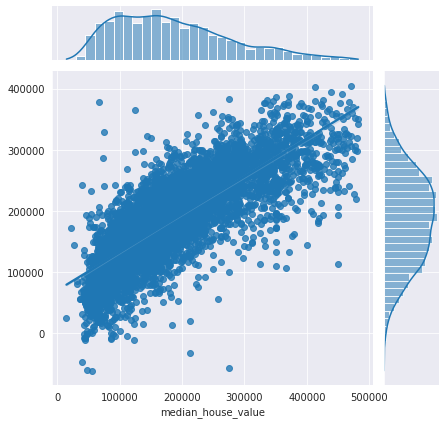

In [ ]:
sns.jointplot(y_test,y_predict,kind='reg')
plt.show()

<Figure size 576x288 with 0 Axes>

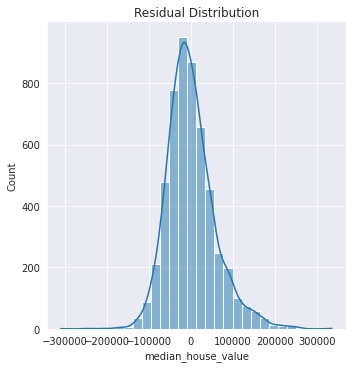

In [ ]:
plt.figure(figsize=(8,4))
sns.displot(y_test-y_predict, bins=30 , kde=True)
plt.title('Residual Distribution')
plt.show()

In [ ]:
r1 = np.sqrt(mean_squared_error(y_test,y_predict))
r2_dt = np.sqrt(mean_squared_error(y_test,y_predict_dt))
r3_la = np.sqrt(mean_squared_error(y_test,y_predict_lasso))
r4_el = np.sqrt(mean_squared_error(y_test,y_predict_el))
r5_rf = np.sqrt(mean_squared_error(y_test,y_predict_rf))

p1 =r2_score(y_test,y_predict)
p2 =r2_score(y_test,y_predict_dt)
p3 =r2_score(y_test,y_predict_lasso)
p4 =r2_score(y_test,y_predict_el)
p5 = r2_score(y_test,y_predict_rf)

In [ ]:
pd.DataFrame({'Model': ['Linear Regression','Decision Tree Regression','Lasso','Elastic Net','RandomForest'],
              'RMSE':[r1, r2_dt, r3_la, r4_el, r5_rf],
              'R^2' :[p1,p2,p3,p4,p5]})

,Model,RMSE,R^2
0,Linear Regression,58105.032648,0.621855
1,Decision Tree Regression,63966.298146,0.541718
2,Lasso,58105.037394,0.621855
3,Elastic Net,58478.092535,0.616984
4,RandomForest,44537.718382,0.777830


After implementing different algorithms, we see that RandomForest outperforms other algorithms in terms of both Root Mean Square Error and Coefficient of determination

## Further Steps
1. Investigate **multicollinearity** among features. 
2. New features can be added, and features exceeding the **Variance Inflation Factor** threshold can be dropped.
3.  The fitted plot suggests that the data is not completely homoscedastic. Removing Heteroscedasticity from the data may lead to better results.

# Sources

- [Types of Categorical Data Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/)
- [How to detect outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)